In [ ]:
#################################################################################
############------- Machine Learning Inmersion ------------######################
#################################################################################
# Capacitador: André Omar Chávez Panduro
# email: andrecp38@gmail.com / andre.chavez@urp.edu.pe
# Sesion02 : Algoritmos de Clasificacion: Regresion Logistica - Naive Bayes - KNN
# version: 1.0
#################################################################################

![image.png](attachment:image.png)

In [ ]:
##################################################
## Desarrollo de Modelos de Machine Learning
##################################################

![image.png](attachment:image.png)

In [ ]:
## Leemos las librerias necesarias para poder trabajar

In [ ]:
#Importar las librerías necesarias en Python.
## Manejo de dataframes o set de datos / Importar pandas
import warnings
warnings.filterwarnings("ignore")
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python

In [ ]:
## Leemos los datos o el dataset a trabajar

In [ ]:
# Leemos la data de desarrollo de modeolos
desarrll = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/DataMiningConsulting/MachineLearningInmersion/Sesion02_MachineLearningInmersion/churn-arboles.csv") 
# Leer el dataset en un dataframe usando pandas

In [ ]:
#desarrll.head(5)
desarrll.CHURN.value_counts()

In [ ]:
# Dimension

# Son 614 obs con 13 columnas

(1345, 8)

In [ ]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
ID         1345 non-null int64
EDAD       1345 non-null int64
SEXO       1345 non-null object
CIVIL      1345 non-null object
HIJOS      1345 non-null int64
INGRESO    1345 non-null float64
AUTO       1345 non-null object
CHURN      1345 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 84.1+ KB


In [ ]:
## Analisis Exploratorio de los datos

![image.png](attachment:image.png)

In [ ]:
#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [ ]:
desarrll.describe() #Resumen de la información cuantitativa

,ID,EDAD,HIJOS,INGRESO
count,1345.000000,1345.000000,1345.000000,1345.000000
mean,2538.752416,57.452788,0.991822,50640.712448
std,1459.051818,22.707005,0.823262,28354.407405
min,0.000000,18.000000,0.000000,110.284000
25%,1296.000000,38.000000,0.000000,25863.800000
50%,2595.000000,58.000000,1.000000,50290.700000
75%,3779.000000,77.000000,2.000000,75004.500000
max,4999.000000,97.000000,2.000000,99832.900000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

In [ ]:
## Aquí hay algunas conclusiones importantes

In [ ]:
# Tabla Resumen
# Describir todas las variables.

In [ ]:
# Gráficos para variables cuantitativas

In [ ]:
## Cuartiles y diagramas de cajas


Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



![image.png](attachment:image.png)

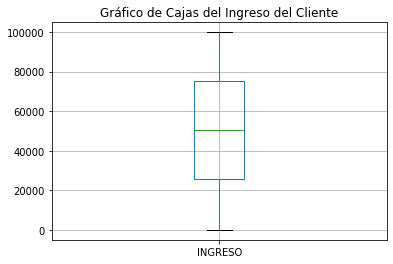

In [ ]:
# Gráfico de Cajas
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas del Ingreso del Cliente')
desarrll.boxplot(column='INGRESO')
#boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [ ]:
# EjercicioN01: Realizar un grafico de cajas de la variable EDAD

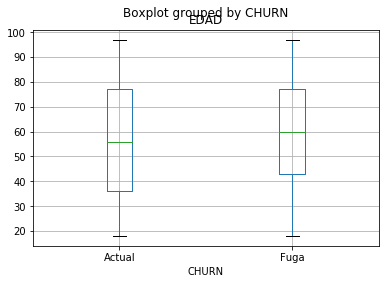

In [ ]:
# Gráficos Bivariados
# Cuando trabajamos modelos o algoritmos supervisados, siempre evaluamos los drivers respecto al target.
desarrll.boxplot('EDAD',by='CHURN')

In [ ]:
# EjercicioN02: Realizar un grafico de cajas de la variable INGRESO vs TARGET

In [ ]:
## Recodificacion e Imputacion de Datos ##

In [ ]:
# Comprobamos la cantidad de valores missings o nulos en los datos
# Completar
desarrll.isnull().sum()

ID         0
EDAD       0
SEXO       0
CIVIL      0
HIJOS      0
INGRESO    0
AUTO       0
CHURN      0
dtype: int64

![image.png](attachment:image.png)

In [ ]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
columnas_categoricas = ["SEXO","CIVIL","AUTO","CHURN"]

In [ ]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(desarrll[str(c)])
    desarrll[str(c)]=le.transform(desarrll[str(c)]) 

SEXO
CIVIL
AUTO
CHURN


In [ ]:
desarrll.head(5)

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN
0,0,57,0,0,2,27535.3,1,1
1,4,68,0,0,2,81000.9,0,1
2,8,34,1,1,0,87467.1,1,0
3,10,60,1,0,2,83220.6,0,1
4,13,28,0,0,2,20850.4,0,1


In [ ]:
########################################
## Feature Enginnering ##
########################################

![image.png](attachment:image.png)

In [ ]:
## Creación de Variables por Decision de Negocio o de acuerdo a metodologías más automatizadas es el
# corazon de Machine Learning
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de scoreo o data productiva.

In [ ]:
desarrll.shape

(614, 13)

In [ ]:
desarrll.head(1)

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN
0,0,57,0,0,2,27535.3,1,1


In [ ]:
# Ingenieria de datos
#Creamos las variables para el entrenamiento o train

desarrll['INGRESOxHIJO']  = desarrll['INGRESO']/(desarrll['HIJOS']+1)
desarrll['Log_INGRESO']   = round(np.log(desarrll['INGRESO']+1),2)

# Crear alguna otra variable interesante en el dataset

In [ ]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
desarrll.shape

(1345, 10)

In [ ]:
desarrll.head(2)

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN,INGRESOxHIJO,Log_INGRESO
0,0,57,0,0,2,27535.3,1,1,9178.433333,10.22
1,4,68,0,0,2,81000.9,0,1,27000.300000,11.30


In [ ]:
########################################
# Particion Muestral de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
desarrll = desarrll.drop('ID', axis=1) # Axis=1

In [ ]:
desarrll.head(2)

,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,CHURN,INGRESOxHIJO,Log_INGRESO
0,57,0,0,2,27535.3,1,1,9178.433333,10.22
1,68,0,0,2,81000.9,0,1,27000.300000,11.30


In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(                 ,  # Drivers
                                                    df['CHURN'], 
                                                                     ,  # TTamaño test
                                                    stratify=desarrll['CHURN'],
                                                    random_state=100)

In [ ]:
########################################
# Selección de Variables
########################################

![image.png](attachment:image.png)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo

forest = RandomForestClassifier()   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train)        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_ # Variables importantes




In [ ]:
importances

array([0.19667555, 0.27233093, 0.01986027, 0.02893058, 0.1627987 ,
       0.01791763, 0.14241425, 0.1590721 ])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,SEXO,0.272331
1,EDAD,0.196676
2,INGRESO,0.162799
3,Log_INGRESO,0.159072
4,INGRESOxHIJO,0.142414
5,HIJOS,0.028931
6,CIVIL,0.019860
7,AUTO,0.017918


In [ ]:
########################################
# Modelamiento de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
## Modelos Supervisados : Regresion Logistica ##

In [ ]:
# Paso N°01: Llamar o instanciar el algoritmo predictivo
from sklearn.linear_model import LogisticRegression
RegLog = LogisticRegression(penalty='l1') # Paso N°02: Configuro el algoritmo
RegLog.fit(X_train, y_train)  # Paso N°03: Entreno o ajusto el algoritmo predictivo a los datos

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=RegLog.predict(X_train) # Prediccion sobre el train
y_pred_test= RegLog.predict(X_test) # Prediccion sobre el test
# Predecimos las probabilidades tambien
y_score_train=RegLog.predict_proba(X_train) # Prediccion sobre el train
y_score_test= RegLog.predict_proba(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real
from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)



Matriz confusion: Train
[[430 152]
 [ 67 292]]
Matriz confusion: Test
[[176  74]
 [ 29 125]]
Accuracy: Train
0.767268862911796
Accuracy: Test
0.745049504950495
Precision: Train
0.6576576576576577
Precision: Test
0.628140703517588
Recall: Train
0.8133704735376045
Recall: Test
0.8116883116883117


In [ ]:
! pip install --user plot_metric
#! pip install h5py

In [ ]:
# Instalamos la libreria plot_metric para visualizar nuestros resultados
from plot_metric.functions import BinaryClassification

In [ ]:
bc = BinaryClassification(y_test, y_pred_test, labels=["No Fuga", "Fuga"])

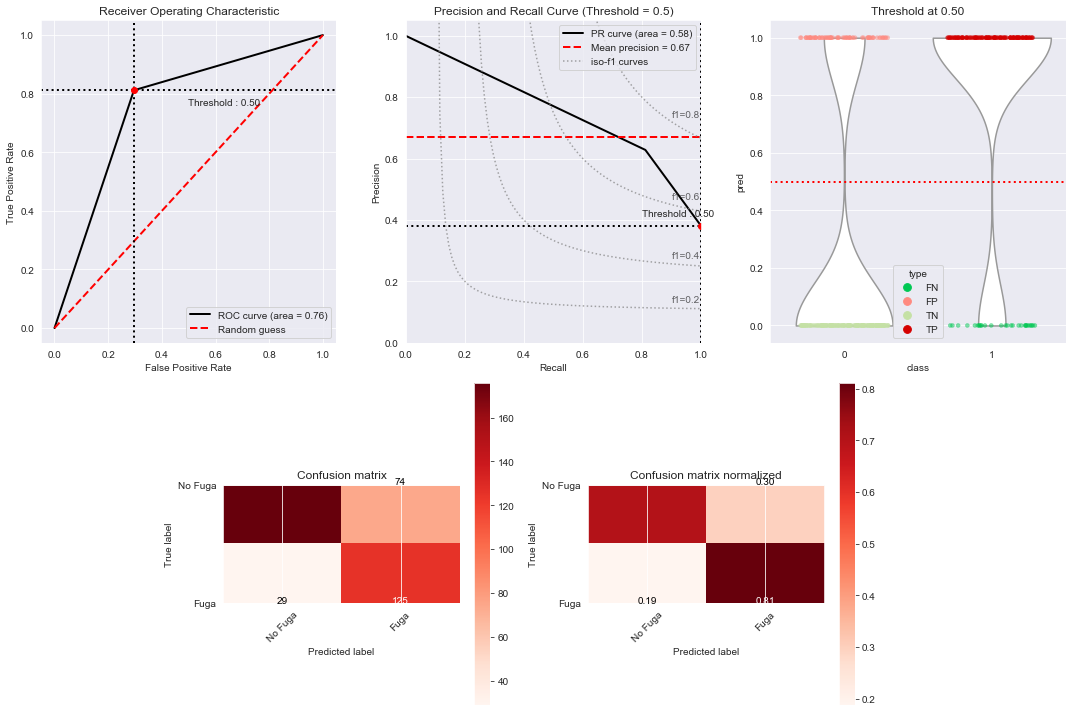

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     No Fuga       0.86      0.70      0.77       250
        Fuga       0.63      0.81      0.71       154

    accuracy                           0.75       404
   macro avg       0.74      0.76      0.74       404
weighted avg       0.77      0.75      0.75       404



In [ ]:
# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()


In [ ]:
## Modelos Supervisados : Regresion Naive-Bayes ##

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Paso1:Instanciamos el algoritmo 
NB = GaussianNB()
# Paso2:Ajustamos o entrenamos el algoritmo 
NB.fit(X_train, y_train)
GaussianNB(priors=None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Ejercicio: Hallar los indicadores sobre los datos de test con el algoritmo Naive Bayes.

In [ ]:
## Modelos Supervisados : Regresion K-NN ##

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=20,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [ ]:
# Ejercicio: Hallar los indicadores sobre los datos de test con el algoritmo Knn

In [ ]:
##################################################
## Implementación de Modelos de Machine Learning
##################################################

In [ ]:
# Tarea !!

In [ ]:
# Fin !!